In [2]:
import pandas as pd
import json

import os
import glob

path = '/Users/matthewhwang/Galvanize/Capstone1/What-We-Talkin-Bout/data/Discographies/_Mastered_Cleaned'

songs = []

files = [f for f in glob.glob(path + "**/*.txt")]
for each in files:
    with open(each, 'r') as f:
        contents = json.load(f)["Discography"]
        for song in contents:
            songs.append(song['lyrics'])


In [3]:
len(songs)

3442

NameError: name 'df' is not defined

In [4]:
df = pd.DataFrame(songs)

In [5]:
df.head()

,0
0,Yo you know wha...
1,Aight check thi...
2,Nobody likes me Nobody likes ...
3,How you gonna t...
4,uhhuh huh uh hu...


In [6]:
df['index'] = df.index

In [7]:
df.columns = ['lyrics','index']

In [8]:
documents = df

In [12]:
len(df['lyrics'].iloc[0].split())

592

In [13]:
documents['count'] = df['lyrics'].apply(lambda x: len(x.split()))

In [14]:
documents['count'].sum(axis=0)

1972066

In [15]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/matthewhwang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
def lemmatize_stemming(text):
    stemmer = SnowballStemmer("english")
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [12]:

# doc_sample = documents[documents['index'] == 100].values[0][0]
# print('original document: ')
# words = []
# for word in doc_sample.split(' '):
#     words.append(word)
# print(words)
# print('\n\n tokenized and lemmatized document: ')
# print(preprocess(doc_sample))

In [17]:
processed_docs = documents['lyrics'].map(preprocess)
processed_docs[:10]

0    [know, want, want, beat, drop, rightnow, nigga...
1    [aight, check, shit, yall, niggaz, stay, right...
2    [like, like, that, okay, dont, like, yall, don...
3    [gonna, like, bitch, nigga, snitch, repres, ni...
4    [uhhuh, huhhuh, huhhuh, huhhuh, huhhuh, huhhuh...
5    [southsid, yall, nigga, know, dirti, south, ti...
6    [real, shit, nigga, nigga, somethin, slick, yo...
7    [aint, easi, money, whoo, everybodi, wanna, mo...
8    [bitch, dont, like, somethin, wrong, bitch, fu...
9    [yall, know, shit, babi, come, trackmast, look...
Name: lyrics, dtype: object

In [18]:
count = 0
for each in list(processed_docs):
    count += len(each)
count

784528

In [19]:
nc = []
for each in list(processed_docs):
    nc.append(' '.join(word for word in each))

In [20]:
nc

['know want want beat drop rightnow nigga thinkin crazi right crazi aint crazi crazi dont think crazi think shit think crazi wannamani dont know money make shit ugli money make hoe love money make nigga wanna slug mani think money love actual write feloni worth picasso dont smile nigga wile rememb good time chip stack clip pack brick cook coke crack tombston read tri start write heart itll number chart sensit shit dont fuck sound like playin sayin shit real aint game good young guess grimi nigga live long time fanci whip champagn shine eye eye happen stretch convinc happen anybodi vest dress hood mess nigga runnin round shootin shit drinkin gossip shut fuck nigga like hard know butt gettin rob aint good time press luck duke listen gonna hurt youll turn shine later patienc virtu right need gimm cash forget boss bein save good stash see throw garbag like trash alright shoot hate need cash know gotta hate fast dont think stick listen like shit nigga steve stout write shit drop real caus d

In [16]:
import pickle

In [17]:
 with open('processedall.p', 'wb') as f:
        pickle.dump(nc, f)

In [18]:
len(nc)

3442

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

tf = CountVectorizer()

document_tf_matrix = tf.fit_transform(nc).todense()

print(sorted(tf.vocabulary_))
print(document_tf_matrix)

['aaaaaaaay', 'aaaaaaahhhhhhhh', 'aaaaah', 'aaaaahhh', 'aaaaall', 'aaaaass', 'aaaah', 'aaaawwww', 'aaaawwwwwwwww', 'aaah', 'aaahaaaah', 'aaahhh', 'aaahhhhhh', 'aaall', 'aaawww', 'aaawwwww', 'aaawwwwww', 'aaghh', 'aahhh', 'aahhhh', 'aaliyah', 'aand', 'aaron', 'aayooh', 'aback', 'abandon', 'abba', 'abbey', 'abbi', 'abbrevi', 'abc', 'abcd', 'abck', 'abdomen', 'abdomin', 'abduct', 'abdul', 'abel', 'abercrombi', 'abernathi', 'abi', 'abid', 'abiddout', 'abil', 'abl', 'ablaz', 'abloh', 'aboard', 'abolish', 'abomin', 'abort', 'abou', 'abound', 'abouta', 'aboutcha', 'aboutchu', 'abr', 'abracadabra', 'abraham', 'abram', 'abroad', 'absenc', 'absent', 'absente', 'absolut', 'absorb', 'absorpt', 'abstin', 'abstract', 'absurd', 'abund', 'abus', 'abusin', 'academ', 'academi', 'acam', 'acapella', 'acapulco', 'accapella', 'accapoco', 'acceler', 'acceleratin', 'accellerat', 'accent', 'accept', 'acceptin', 'access', 'accessor', 'accessori', 'accessoris', 'acci', 'accid', 'acciden', 'accident', 'acclaim', 

In [22]:
len(tf.vocabulary_)

25212

In [20]:
from math import log

def idf(frequency_matrix):
    df =  float(len(document_tf_matrix)) / sum(frequency_matrix > 0)
    return [log(i) for i in df.getA()[0]]
print(sorted(tf.vocabulary_))
print(idf(document_tf_matrix))

['aaaaaaaay', 'aaaaaaahhhhhhhh', 'aaaaah', 'aaaaahhh', 'aaaaall', 'aaaaass', 'aaaah', 'aaaawwww', 'aaaawwwwwwwww', 'aaah', 'aaahaaaah', 'aaahhh', 'aaahhhhhh', 'aaall', 'aaawww', 'aaawwwww', 'aaawwwwww', 'aaghh', 'aahhh', 'aahhhh', 'aaliyah', 'aand', 'aaron', 'aayooh', 'aback', 'abandon', 'abba', 'abbey', 'abbi', 'abbrevi', 'abc', 'abcd', 'abck', 'abdomen', 'abdomin', 'abduct', 'abdul', 'abel', 'abercrombi', 'abernathi', 'abi', 'abid', 'abiddout', 'abil', 'abl', 'ablaz', 'abloh', 'aboard', 'abolish', 'abomin', 'abort', 'abou', 'abound', 'abouta', 'aboutcha', 'aboutchu', 'abr', 'abracadabra', 'abraham', 'abram', 'abroad', 'absenc', 'absent', 'absente', 'absolut', 'absorb', 'absorpt', 'abstin', 'abstract', 'absurd', 'abund', 'abus', 'abusin', 'academ', 'academi', 'acam', 'acapella', 'acapulco', 'accapella', 'accapoco', 'acceler', 'acceleratin', 'accellerat', 'accent', 'accept', 'acceptin', 'access', 'accessor', 'accessori', 'accessoris', 'acci', 'accid', 'acciden', 'accident', 'acclaim', 

[8.143807976771484, 7.450660796211539, 8.143807976771484, 7.450660796211539, 8.143807976771484, 8.143807976771484, 8.143807976771484, 8.143807976771484, 8.143807976771484, 7.045195688103375, 8.143807976771484, 7.045195688103375, 7.450660796211539, 8.143807976771484, 8.143807976771484, 8.143807976771484, 8.143807976771484, 8.143807976771484, 8.143807976771484, 7.450660796211539, 5.310594632715269, 8.143807976771484, 5.946583399435266, 8.143807976771484, 7.450660796211539, 5.199368997605045, 7.450660796211539, 7.450660796211539, 7.450660796211539, 8.143807976771484, 6.757513615651594, 8.143807976771484, 8.143807976771484, 7.450660796211539, 8.143807976771484, 7.450660796211539, 8.143807976771484, 7.045195688103375, 8.143807976771484, 8.143807976771484, 6.757513615651594, 6.197897827716171, 8.143807976771484, 6.534370064337384, 3.853348535623094, 7.045195688103375, 8.143807976771484, 6.197897827716171, 7.450660796211539, 7.045195688103375, 4.560289038315375, 8.143807976771484, 8.143807976

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
document_tfidf_matrix = tfidf.fit_transform(nc)
print(sorted(tfidf.vocabulary_))
print(document_tfidf_matrix.todense())

['aaaaaaaay', 'aaaaaaahhhhhhhh', 'aaaaah', 'aaaaahhh', 'aaaaall', 'aaaaass', 'aaaah', 'aaaawwww', 'aaaawwwwwwwww', 'aaah', 'aaahaaaah', 'aaahhh', 'aaahhhhhh', 'aaall', 'aaawww', 'aaawwwww', 'aaawwwwww', 'aaghh', 'aahhh', 'aahhhh', 'aaliyah', 'aand', 'aaron', 'aayooh', 'aback', 'abandon', 'abba', 'abbey', 'abbi', 'abbrevi', 'abc', 'abcd', 'abck', 'abdomen', 'abdomin', 'abduct', 'abdul', 'abel', 'abercrombi', 'abernathi', 'abi', 'abid', 'abiddout', 'abil', 'abl', 'ablaz', 'abloh', 'aboard', 'abolish', 'abomin', 'abort', 'abou', 'abound', 'abouta', 'aboutcha', 'aboutchu', 'abr', 'abracadabra', 'abraham', 'abram', 'abroad', 'absenc', 'absent', 'absente', 'absolut', 'absorb', 'absorpt', 'abstin', 'abstract', 'absurd', 'abund', 'abus', 'abusin', 'academ', 'academi', 'acam', 'acapella', 'acapulco', 'accapella', 'accapoco', 'acceler', 'acceleratin', 'accellerat', 'accent', 'accept', 'acceptin', 'access', 'accessor', 'accessori', 'accessoris', 'acci', 'accid', 'acciden', 'accident', 'acclaim', 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [22]:
a = document_tfidf_matrix.todense()

In [23]:
new = pd.DataFrame(a)

In [24]:
len(new)

3442

In [25]:
new

,0,1,2,3,4,5,6,7,8,9,...,25202,25203,25204,25205,25206,25207,25208,25209,25210,25211
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
import numpy as np

def cosine_distance(a, b):
    """Compute the cosine dissimilarity between two numpy arrays.
    Parameters
    ----------
    a: numpy array
    b: numpy array
    Returns
    -------
    distance: float
    """
    return 1 - np.dot(a, b) / np.sqrt(np.dot(a, a) * np.dot(b, b))

In [26]:
a = np.array(new.iloc[0,:])
b = np.array(new.iloc[1500,:])


NameError: name 'new' is not defined

In [27]:
dist = cosine_distance(a,b)

NameError: name 'a' is not defined

In [28]:
dist

NameError: name 'dist' is not defined

In [29]:
import pandas as pd
import json

import os
import glob

path = '/Users/matthewhwang/Galvanize/Capstone1/What-We-Talkin-Bout/data/Discographies/_Mastered_Cleaned'

artists = []
track = []

files = [f for f in glob.glob(path + "**/*.txt")]
for each in files:
    with open(each, 'r') as f:
        contents = json.load(f)["Discography"]
        for song in contents:
            artists.append(song['artist'])
            track.append(song['track'])


In [31]:
dfa = pd.DataFrame(artists)

In [62]:
pd.set_option('display.max_rows', 5000)

In [32]:
dfa.count

<bound method DataFrame.count of                    0
0             50cent
1             50cent
2             50cent
3             50cent
4             50cent
5             50cent
6             50cent
7             50cent
8             50cent
9             50cent
10            50cent
11            50cent
12            50cent
13            50cent
14            50cent
15            50cent
16            50cent
17            50cent
18            50cent
19            50cent
20            50cent
21            50cent
22            50cent
23            50cent
24            50cent
25            50cent
26            50cent
27            50cent
28            50cent
29            50cent
...              ...
3412   kendricklamar
3413   kendricklamar
3414   kendricklamar
3415   kendricklamar
3416   kendricklamar
3417   kendricklamar
3418   kendricklamar
3419   kendricklamar
3420   kendricklamar
3421   kendricklamar
3422   kendricklamar
3423   kendricklamar
3424   kendricklamar
3425   kendricklamar
3

In [33]:
artists

['50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 'missymisdemeanorelliott',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50cent',
 '50

In [34]:
new['artist'] = artists
new['track'] = track

NameError: name 'new' is not defined

In [35]:
new

NameError: name 'new' is not defined

In [79]:
with open('vectorized_df.p', 'wb') as f:
    pickle.dump(new, f)

In [86]:
rappers = ['50cent','snoopdogg','notoriousbig','eminem','jayz','lilwayne','kanyewest','2chainz','2pac','bigsean','jcole','kendricklamar']

In [87]:
rapdf = []
for each in rappers:
    rapdf.append(new[new['artist'] == each])

In [146]:
with open('vectorized_df_artists.p', 'wb') as f:
    pickle.dump(rapdf, f)

In [139]:
rapdf[3] = rapdf[3][rapdf[3].sum(axis=1) != 0]

In [141]:
# RAPPER SELF COSINE SIMILARITY

my_dict = {}

for each in rapdf:
    record_name = list(each['track'])
    test = each.drop(['artist','track'],axis = 1)
    vectors = []
    for i in range(len(each)):
        vectors.append(np.array(test.iloc[i,:]))
    cosine_diff = []
    for song in vectors:
        average = []
        for song2 in vectors:
            average.append(cosine_distance(song,song2))
        cosine_diff.append(np.mean(average))
    artist = list(each['artist'])[0]
    my_dict[artist] = {}
    my_dict[artist]['tracks'] = record_name
    my_dict[artist]['self_artist_cosine'] = cosine_diff
    

In [142]:
for each in my_dict:
    print(each)
    print(np.mean(my_dict[each]['self_artist_cosine']))

50cent
0.9113270864407379
snoopdogg
0.941235114252377
notoriousbig
0.9031612883330381
eminem
0.9254121694981333
jayz
0.9327522352576945
lilwayne
0.9235228377701913
kanyewest
0.948228817986495
2chainz
0.943538320269156
2pac
0.9076582955590479
bigsean
0.920379493492309
jcole
0.8975211371082353
kendricklamar
0.929618463051323


In [143]:
import seaborn as sb
import matplotlib.pyplot as plt

In [145]:
with open('self_artist_cosine.p', 'wb') as f:
    pickle.dump(my_dict, f)

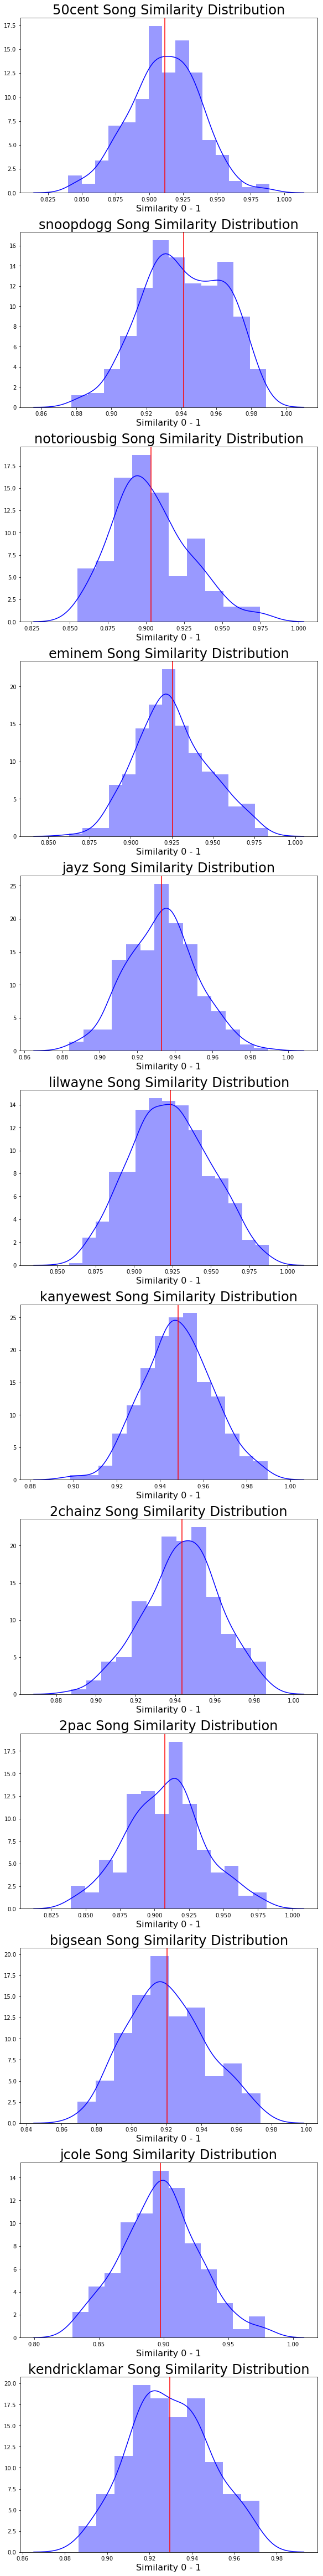

In [144]:

num = len(my_dict)
fig, axes = plt.subplots(num,1, figsize=(8,64))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)



for i,each in enumerate(my_dict):
    sb.distplot(my_dict[each]['self_artist_cosine'],color="b",ax=axes[i])
    axes[i].set_title(each+" Song Similarity Distribution",fontsize="24")
    axes[i].set_xlabel("Similarity 0 - 1",fontsize="16")
    axes[i].axvline(np.mean(my_dict[each]['self_artist_cosine']),color='r')
    


In [ ]:
for i,each in enumerate(my_dict):
    sb.distplot(my_dict[each]['self_artist_cosine'],color="b",ax=axes[i])
    axes[i].set_title(each+" Song Similarity Distribution",fontsize="24")
    axes[i].set_xlabel("Similarity 0 - 1",fontsize="16")
    axes[i].axvline(np.mean(my_dict[each]['self_artist_cosine']),color='r')
    


NameError: name 'my_dict' is not defined

In [239]:
# REGIONS


west = ['snoopdogg','2pac','kendricklamar']
east = ['50cent','notoriousbig','jayz']
south = ['lilwayne','2chainz','jcole']
mw = ['eminem','kanyewest','bigsean']

westn = [1,8,11]
eastn = [2,4,0]
southn = [5,7,10]
mwn = [3,6,9]

# Rapper Song to Region

In [290]:
# RAPPER To Region COSINE SIMILARITY

region_dict = {}

for each in eastn:
    dummy = eastn.copy()
    record_name = list(rapdf[each]['track'])
    test = rapdf[each].drop(['artist','track'],axis = 1)
    this_artist_songs = []
    for i in range(len(rapdf[each])):
            this_artist_songs.append(np.array(test.iloc[i,:]))
    all_vectors = []
    dummy.remove(each)
    for n in dummy:
        test = rapdf[n].drop(['artist','track'],axis = 1)
        for i in range(len(rapdf[n])):
            all_vectors.append(np.array(test.iloc[i,:]))
    cosine_diff = []
    for song in this_artist_songs:
        average = []
        for song2 in all_vectors:
            average.append(cosine_distance(song,song2))
        cosine_diff.append(np.mean(average))
    artist = list(rapdf[each]['artist'])[0]
    region_dict[artist] = {}
    region_dict[artist]['tracks'] = record_name
    region_dict[artist]['region_cosine'] = cosine_diff
    

In [291]:
region_dict

{'notoriousbig': {'tracks': ['holdyahead',
   'justamemory',
   'wakeup',
   'loveiseverlastingoutro',
   'notoriousthugs',
   'hypnotize',
   'notoriousbig',
   'juicy',
   'partyandbullshit',
   'warning',
   'onemorechanceremix',
   'kickinthedoor',
   'whatsbeef',
   'theworldisfilled',
   'onemorechancethelegacyremix',
   'microphonemurderer',
   'guaranteedraw',
   'lovenoho',
   'getmoney',
   'hellovspartybullshitmatomaremix',
   'macsanddons',
   'playersanthem',
   'runningyourmouth',
   'wantthatoldthingback',
   'intro',
   'thingsdonechanged',
   'gimmetheloot',
   'machinegunfunk',
   'warning',
   'readytodie',
   'onemorechance',
   'fuckmeinterlude',
   'thewhat',
   'juicy',
   'everydaystruggle',
   'memybitch',
   'bigpoppa',
   'respect',
   'friendofmine',
   'unbelieveable',
   'suicidalthoughts',
   'justplayingdreams',
   'lifeafterdeathintro',
   'somebodysgottadie',
   'hypnotize',
   'kickinthedoor',
   'fuckyoutonight',
   'lastday',
   'ilovethedough',
   

In [258]:
with open('mw_region_cosine.p', 'wb') as f:
    pickle.dump(region_dict, f)

In [292]:
#west_region = region_dict
east_region = region_dict
#south_region = region_dict
#midw_region = region_dict

In [24]:
#Intra region similarities

fig, axes = plt.subplots(3,1, figsize=(8,21))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)



for i,each in enumerate(midw_region):
    sb.distplot(midw_region[each]['region_cosine'],color="b",ax=axes[i])
    axes[i].set_title(each+" Intra Region Cosine Similarity",fontsize="24")
    axes[i].set_xlabel("Similarity 0 - 1",fontsize="16")
    axes[i].axvline(np.mean(midw_region[each]['region_cosine']),color='r')
    


NameError: name 'plt' is not defined

In [234]:
south_region

{'2chainz': {'tracks': ['fork',
   '36',
   'fedswatching',
   'whereubeen',
   'idoit',
   'used2',
   'netflix',
   'extra',
   'udarealest',
   'beautifulpain',
   'sowecanlive',
   'mainstreamrachet',
   'blackunicorn',
   'outroduction',
   'employeeofthemonth',
   'liveandlearniwill',
   'livin',
   'dontdoitintro',
   'trapback',
   'freebase',
   'flexinonmybabymama',
   'wudacudashuda',
   'cribinmycloset',
   'theyknow',
   'roaddawg',
   'betterdope',
   'howitfeel',
   'natural',
   'makinitwerk',
   'traphousestalkin',
   'granny',
   'wefukinitup',
   'pleasedont',
   'fukupayme',
   'keepit100',
   'canttellmeshyt',
   'foreign',
   'part2',
   'xanny',
   'birdbath',
   'djbiggarankinintro',
   'neighborhood',
   'amillibillitrilli',
   'everythingiknow',
   'watchout',
   'bff',
   'ifeellike',
   'goat',
   'haloletterfrommyunbornson',
   'bigmeechera',
   'starterkit',
   'ifididntrap',
   'elchapojr',
   'lapdanceinthetraphouse',
   'bluedolphin',
   'feltlikecappin

# Rapper Inter Region Similarity

In [285]:
# RAPPER To All Outside Region COSINE SIMILARITY

region_dict = {}

for each in mwn:
    dummy = mwn.copy()
    record_name = list(rapdf[each]['track'])
    test = rapdf[each].drop(['artist','track'],axis = 1)
    this_artist_songs = []
    for i in range(len(rapdf[each])):
            this_artist_songs.append(np.array(test.iloc[i,:]))
    all_vectors = []
    america = list(range(12))
    for guy in dummy:
        america.remove(guy)
    for n in america:
        test = rapdf[n].drop(['artist','track'],axis = 1)
        for i in range(len(rapdf[n])):
            all_vectors.append(np.array(test.iloc[i,:]))
    cosine_diff = []
    for song in this_artist_songs:
        average = []
        for song2 in all_vectors:
            average.append(cosine_distance(song,song2))
        cosine_diff.append(np.mean(average))
    artist = list(rapdf[each]['artist'])[0]
    region_dict[artist] = {}
    region_dict[artist]['tracks'] = record_name
    region_dict[artist]['region_cosine'] = cosine_diff
    

In [286]:
region_dict

{'eminem': {'tracks': ['infinite',
   'wegointerlude',
   'itsok',
   '313',
   'tonight',
   'maxine',
   'openmic',
   'never2far',
   'searchin',
   'backstabber',
   'jealousywoesii',
   'introslimshady',
   'lowdowndirty',
   'ifihad',
   'justdontgiveafuck',
   'justthetwoofus',
   'noonesillerthanme',
   'murdermurder',
   'publicserviceannouncementskit',
   'mynameis',
   'guiltyconscience',
   'braindamage',
   'ifihad',
   '97bonnieandclyde',
   'bitchskit',
   'rolemodel',
   'loungeskit',
   'myfault',
   'kenkaniffskit',
   'cumoneverybody',
   'rockbottom',
   'justdontgiveafuck',
   'soapskit',
   'astheworldturns',
   'imshady',
   'badmeetsevil',
   'stilldontgiveafuck',
   'getyoumad',
   'publicserviceannouncement2000skit',
   'killyou',
   'stan',
   'paulskit259617',
   'whoknew',
   'stevebermanskit259616',
   'thewayiam',
   'therealslimshady',
   'rememberme',
   'imback',
   'marshallmathers',
   'drugballad',
   'amityville',
   'bitchpleaseii',
   'kim',
   '

In [287]:
with open('mw_inter_region_cosine.p', 'wb') as f:
    pickle.dump(region_dict, f)

In [288]:
# west_region_inter = region_dict
# east_region_inter = region_dict
# south_region_inter = region_dict
midw_region_inter = region_dict

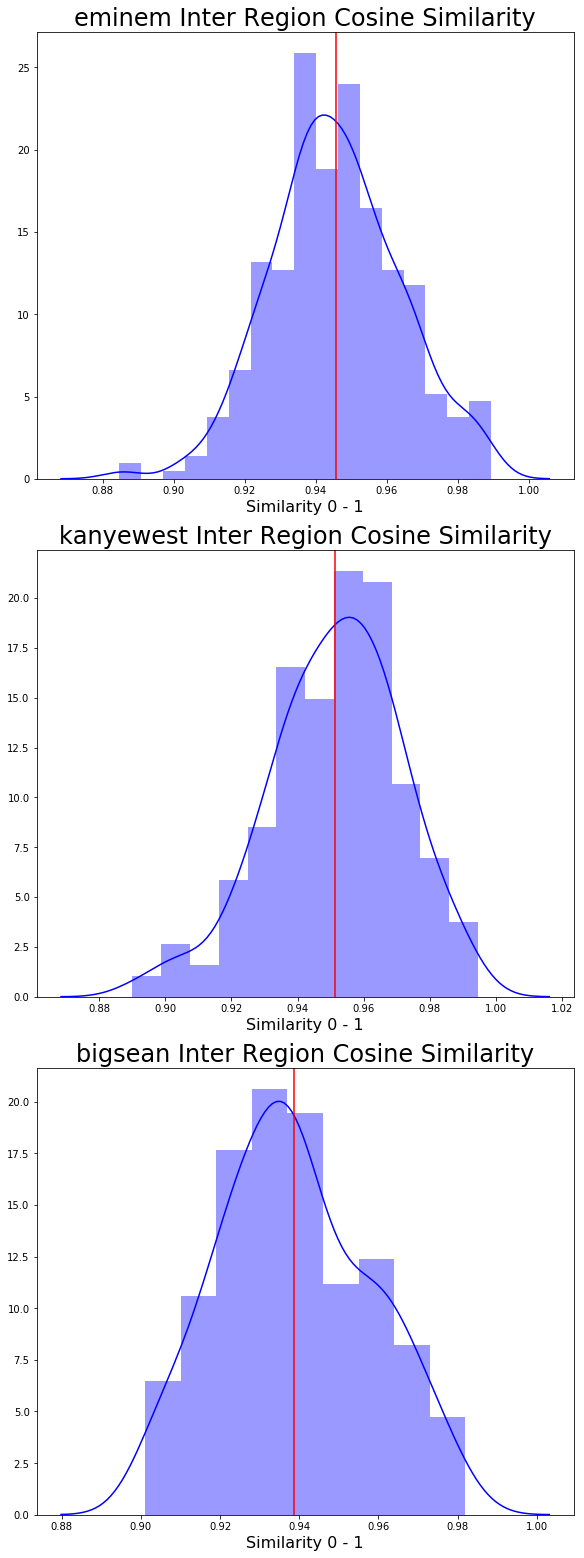

In [289]:
#Intra region similarities

fig, axes = plt.subplots(3,1, figsize=(8,21))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)



for i,each in enumerate(midw_region_inter):
    sb.distplot(midw_region_inter[each]['region_cosine'],color="b",ax=axes[i])
    axes[i].set_title(each+" Inter Region Cosine Similarity",fontsize="24")
    axes[i].set_xlabel("Similarity 0 - 1",fontsize="16")
    axes[i].axvline(np.mean(midw_region_inter[each]['region_cosine']),color='r')
    


# Overlay Graphs Intra and Inter

In [293]:
#west_region = region_dict
#east_region = region_dict
#south_region = region_dict
#midw_region = region_dict

# west_region_inter = region_dict
# east_region_inter = region_dict
# south_region_inter = region_dict
#midw_region_inter = region_dict

In [317]:
intra = south_region
inter = south_region_inter

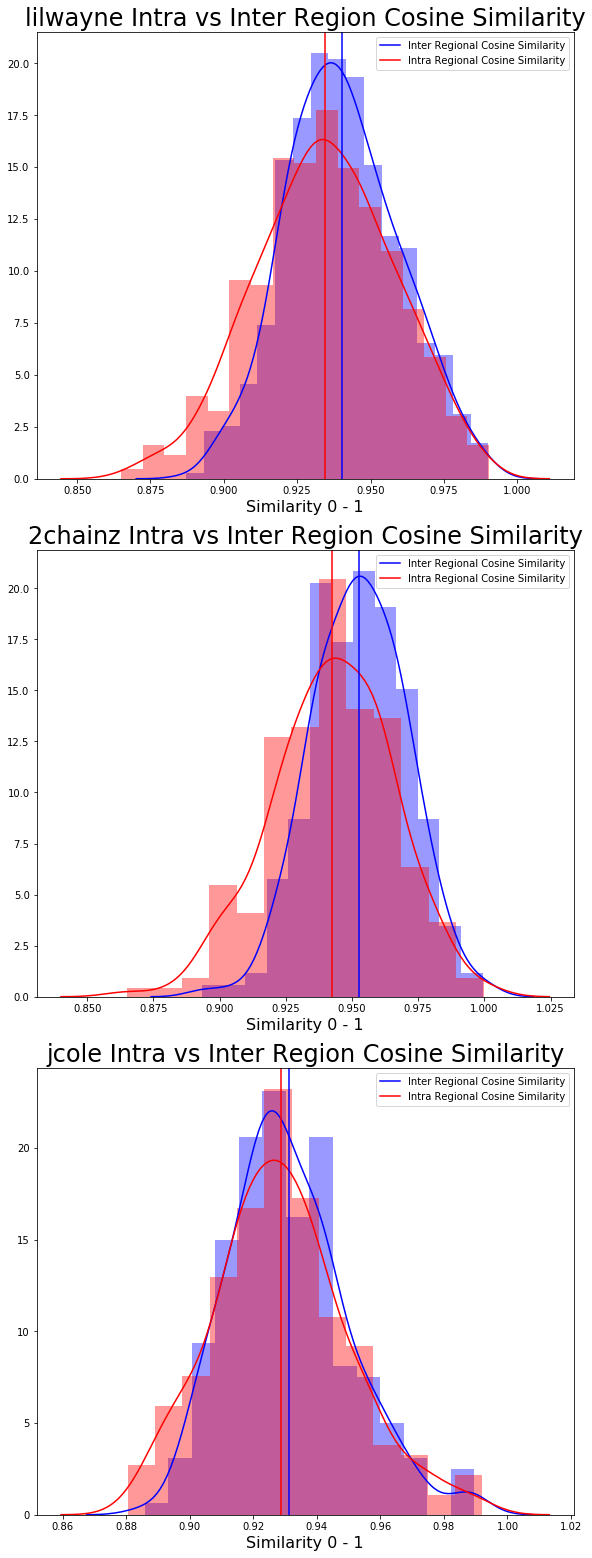

In [318]:
#Comparison of Intra and Inter region similarities

fig, axes = plt.subplots(3,1, figsize=(8,21))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


west = ['snoopdogg','2pac','kendricklamar']
east = ['50cent','notoriousbig','jayz']
south = ['lilwayne','2chainz','jcole']
mw = ['eminem','kanyewest','bigsean']

for i,each in enumerate(south):
    sb.distplot(inter[each]['region_cosine'],color="b",ax=axes[i])
    sb.distplot(intra[each]['region_cosine'],color="r",ax=axes[i])
    axes[i].set_title(each+" Intra vs Inter Region Cosine Similarity",fontsize="24")
    axes[i].set_xlabel("Similarity 0 - 1",fontsize="16")
    axes[i].axvline(np.mean(inter[each]['region_cosine']),color='b')
    axes[i].axvline(np.mean(intra[each]['region_cosine']),color='r')
    axes[i].legend(['Inter Regional Cosine Similarity','Intra Regional Cosine Similarity'])